## Data quality check / cleaning / preparation 

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.** An example is given below.

### Data Preparation
*By Cody Watson*

The following data preparation helped us to prepare our data for implementing various modeling / validation techniques:

In [130]:
# reading data downloaded from pro football reference website and creating training and test data sets
import pandas as pd
import numpy as np
import time
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

# 2017 data
data_2017 = pd.read_csv("2017_data.txt")
NFC_2017 = pd.read_csv("NFC_2017.txt")
AFC_2017 = pd.read_csv("AFC_2017.txt")

# 2018 data
data_2018 = pd.read_csv("2018_data.txt")
NFC_2018 = pd.read_csv("NFC_2018.txt")
AFC_2018 = pd.read_csv("AFC_2018.txt")

# 2019 data
data_2019 = pd.read_csv("2019_data.txt")
NFC_2019 = pd.read_csv("NFC_2019.txt")
AFC_2019 = pd.read_csv("AFC_2019.txt")

# 2020 data
data_2020 = pd.read_csv("2020_data.txt")
NFC_2020 = pd.read_csv("NFC_2020.txt")
AFC_2020 = pd.read_csv("AFC_2020.txt")

# 2021 data
data_2021 = pd.read_csv("2021_data.txt")
NFC_2021 = pd.read_csv("NFC_2021.txt")
AFC_2021 = pd.read_csv("AFC_2021.txt")

# function to acquire training data
def get_data(data, afc_wins , nfc_wins, year):
    team_wins_year = pd.concat((nfc_wins,afc_wins),axis = 0).reset_index(drop=True) # combining all team win totals together
    data_year = pd.merge(team_wins_year,data) # merging offensive data and number of wins 
    data_year = data_year.rename(columns={"Yds.1": "Pass_Yds", "1stD.1": "Pass_1stD", "Yds.2": "Rush_Yds","TD.1" : "Rush_TD", "1stD.2" : "Rush_1stD", "Yds.3" : "Pen_Yds","Y/P": "YardsPerPass", "Y/A": "YardsPerAttempt", "TO%": "TOPerc","Sc%":"ScPerc","TD":"Pass_TD","Att":"Pass_Att","Att.1":"Rush_Att","NY/A":"NYA","1stPy":"Tot_1stPy","1stD":"First_Downs"})
    return data_year
# running function for 2017-2021 data
data_2017 = get_data(data_2017,AFC_2017,NFC_2017,2017)
data_2018 = get_data(data_2018,AFC_2018,NFC_2018,2018)
data_2019 = get_data(data_2019,AFC_2019,NFC_2019,2019)
data_2020 = get_data(data_2020,AFC_2020,NFC_2020,2020)
data_2021 = get_data(data_2021,AFC_2021,NFC_2021,2021)

# appending all training data together into one data set
one = pd.concat((data_2017,data_2018)).reset_index(drop=True)
two = pd.concat((one,data_2019)).reset_index(drop=True)
three = pd.concat((two,data_2020)).reset_index(drop=True)
four = pd.concat((three,data_2021)).reset_index(drop=True)
train_data = four
# test data
data_2022 = pd.read_csv("2022_data.txt")
NFC_2022 = pd.read_csv("NFC_2022.txt")
AFC_2022 = pd.read_csv("AFC_2022.txt")

# function to get test data and actual number of wins
def get_test_data(data, afc_wins , nfc_wins, year):
    team_wins_year = pd.concat((nfc_wins,afc_wins),axis = 0).reset_index(drop=True)
    data = pd.merge(team_wins_year,data)
    data = data.rename(columns={"Yds.1": "Pass_Yds", "1stD.1": "Pass_1stD", "Yds.2": "Rush_Yds","TD.1" : "Rush_TD", "1stD.2" : "Rush_1stD", "Yds.3" : "Pen_Yds","Y/P": "YardsPerPass", "Y/A": "YardsPerAttempt", "TO%": "TOPerc","Sc%":"ScPerc","TD":"Pass_TD","Att":"Pass_Att","Att.1":"Rush_Att","NY/A":"NYA","1stPy":"Tot_1stPy","1stD":"First_Downs"})
    return data
test_data = get_test_data(data_2022,AFC_2022,NFC_2022,2022)

train_data_lin = train_data.copy()
test_data_lin = test_data.copy()
actual_lin = test_data_lin["W"]

# logistic data

# getting actual number of wins values
actual = test_data["W"]

test_data = test_data.drop('W',axis =1)
# making actual wins column binary
actual = [1 if x >= 10 else 0 for x in actual]
# making wins column of training data binary
train_data['W'] = (train_data['W'] >= 10).astype(int)

In [131]:
# dropping irrelevant columns
train_data = train_data.drop(["Tm","G","Rk"], axis = 1)
test_data = test_data.drop(["Tm","G","Rk"], axis = 1)

train_data_lin = train_data_lin.drop(["Tm","G","Rk"], axis = 1)
test_data_lin = test_data_lin.drop(["Tm","G","Rk"], axis = 1)

## Exploratory data analysis

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

### Logistic EDA
*By Cody Watson*

In [15]:
# subsetting data
new_train_data = train_data[['W','Pass_TD' , 'Rush_TD', 'EXP']]

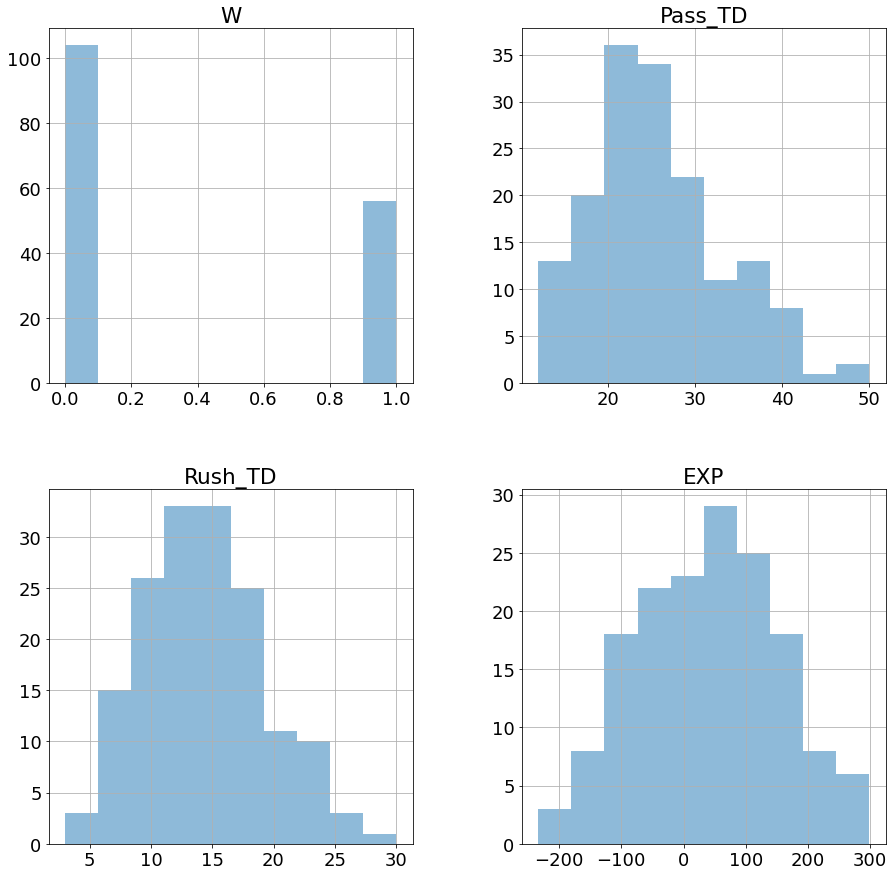

In [30]:
# distribution of relevant predictors
from matplotlib import pyplot
new_train_data.hist(alpha=0.5, figsize=(15, 15))
pyplot.show()

From these distributions, it appears the predictors are roughly normal distributed. Therefore, variable transformations are not needed.

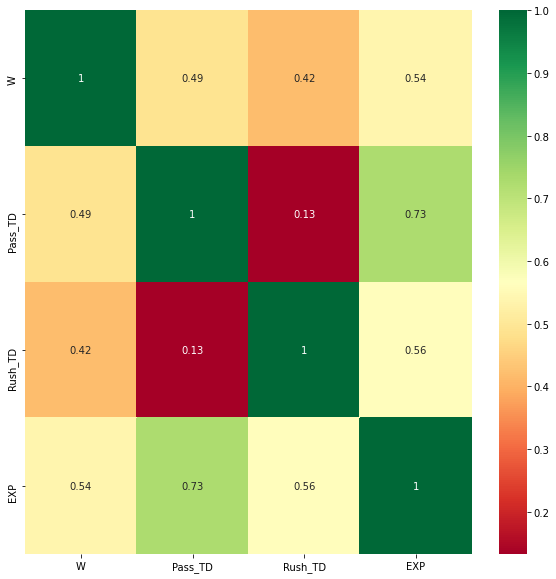

In [17]:
# correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns
corrmat = new_train_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(new_train_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

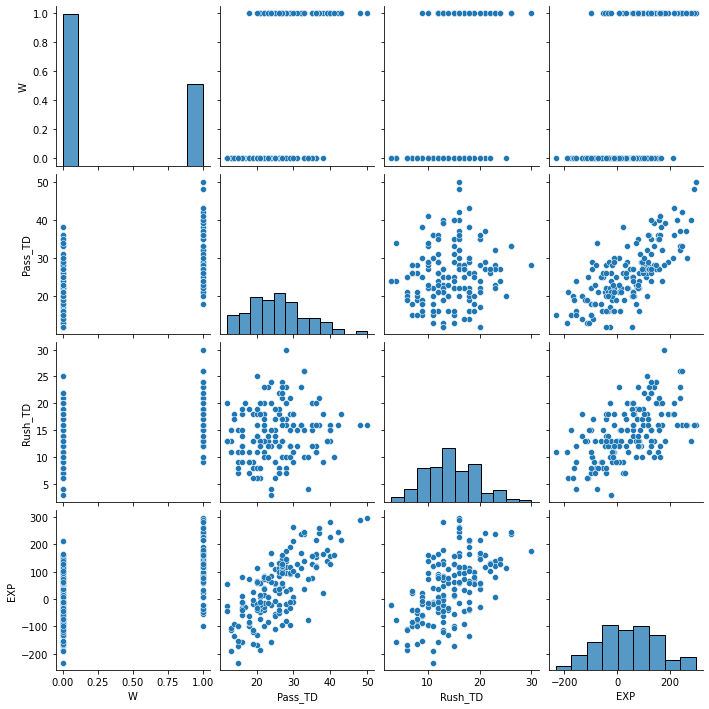

In [18]:
# pairplot
sns.pairplot(new_train_data);

From the pairplot, the variables all appear to exhibit a linear relationship so a variable transformations are not needed. 

### Linear EDA
*By Sid Taneja*

In [147]:
# subsetting data
new_train_data_lin = train_data_lin[['W','Rush_Yds' ,'TOPerc', 'PF','Pass_1stD']]

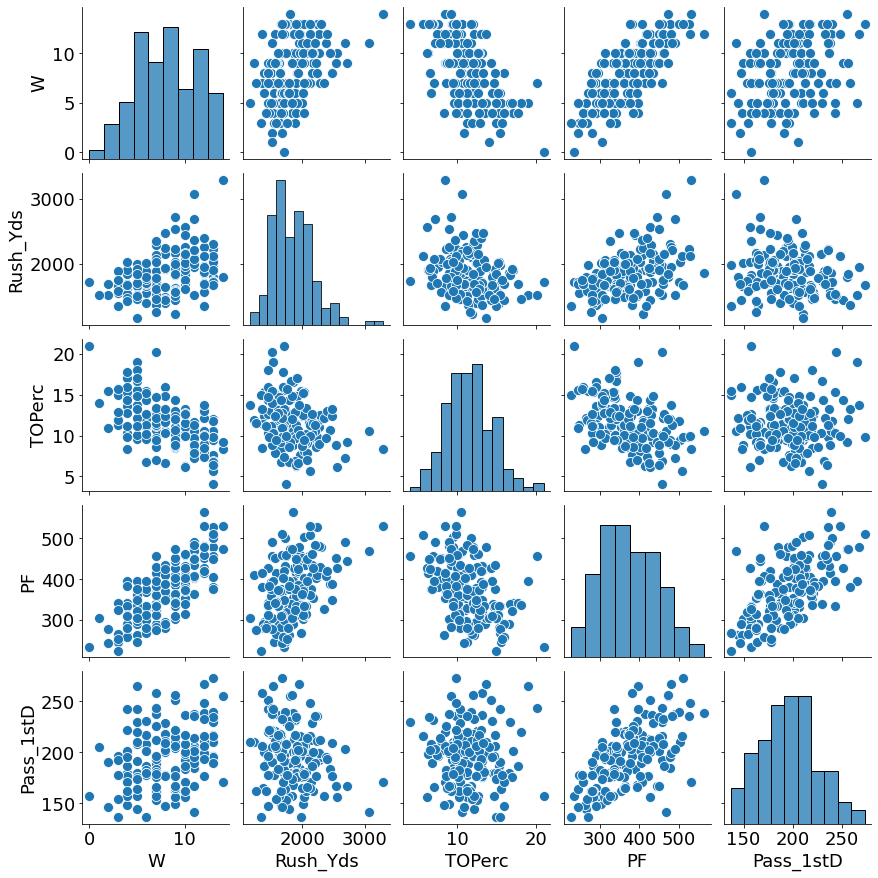

In [144]:
# pairplot
sns.pairplot(new_train_data_lin);

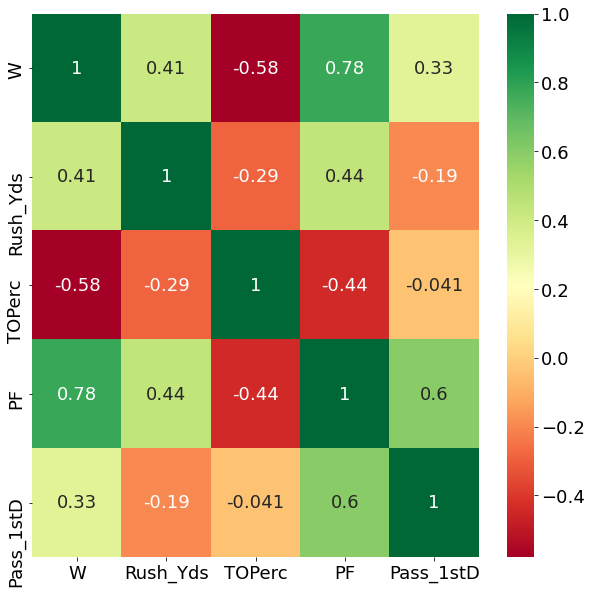

In [145]:
# correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns
corrmat = new_train_data_lin.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(new_train_data_lin[top_corr_features].corr(),annot=True,cmap="RdYlGn")

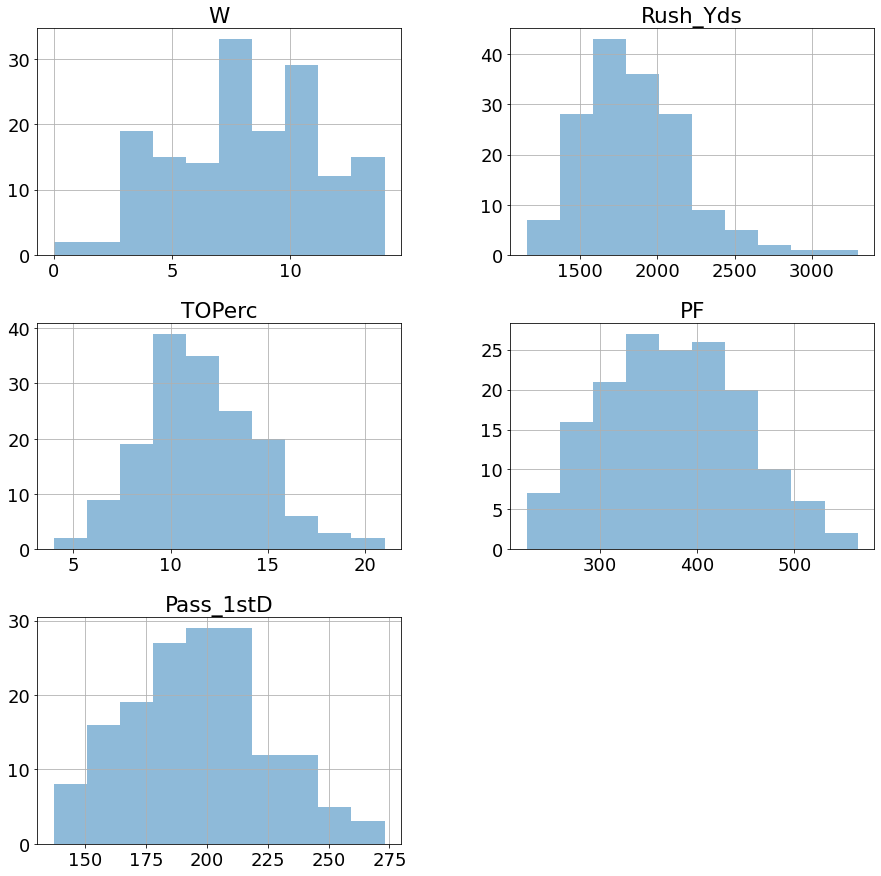

In [146]:
# distribution of relevant predictors
from matplotlib import pyplot
new_train_data_lin.hist(alpha=0.5, figsize=(15, 15))
pyplot.show()

## Developing the model

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

### Logistic Model Development
*By Cody Watson*

In [62]:
# Naive Model
ols_object = smf.logit(formula = 'W~Yds+TO+FL+Cmp+Pass_Att+Pass_Yds+Pass_TD+Int+Rush_Yds+Rush_TD+Pen+Pen_Yds+First_Downs+Rush_1stD+YardsPerPass+YardsPerAttempt+Rush_1stD+TOPerc+Ply+PF+NYA+EXP+ScPerc + Rush_Att + Tot_1stPy', data = train_data)
naive_model = ols_object.fit()
naive_model.summary()

         Current function value: 0.245921
         Iterations: 35


/Users/codywatson/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      W   No. Observations:                  160
Model:                          Logit   Df Residuals:                      136
Method:                           MLE   Df Model:                           23
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.6202
Time:                        18:08:36   Log-Likelihood:                -39.347
converged:                      False   LL-Null:                       -103.59
Covariance Type:            nonrobust   LLR p-value:                 1.207e-16
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          17.4074     67.333      0.259      0.796    -114.563     149.378
Yds                -0.0487   2175.808  -2.24e-05      1.000   -4264.554    4264.457
TO                  0.2505   3.82e+05   6.55e-07      1.000   -7.49e+05    7.49e+05
FL                  0.1269   3.82e+05   3.32e-07      1.000   -7.49e+05    7.49e+05
Cmp                 0.0427      0.026      1.619      0.105      -0.009       0.094
Pass_Att            0.0176      0.038      0.457      0.648      -0.058       0.093
Pass_Yds            0.0583   2175.808   2.68e-05      1.000   -4264.447    4264.564
Pass_TD            -0.1664      0.150     -1.112      0.266      -0.460       0.127
Int                 0.2009   3.82e+05   5.26e-07      1.000   -7.49e+05    7.49e+05
Rush_Yds            0.0318   2175.808   1.46e-05      1.000   -4264.474    4264.537
Rush_TD            -0.1882      0.188     -0.999      0.318      -0.557       0.181
Pen                 0.0828      0.060      1.376      0.169      -0.035       0.201
Pen_Yds            -0.0058      0.006     -0.935      0.350      -0.018       0.006
First_Downs         0.0398      0.049      0.815      0.415      -0.056       0.135
Rush_1stD          -0.0487      0.057     -0.853      0.393      -0.160       0.063
YardsPerPass       -4.8195      9.946     -0.485      0.628     -24.313      14.674
YardsPerAttempt     7.6121      5.287      1.440      0.150      -2.749      17.974
TOPerc             -1.0575      0.751     -1.408      0.159      -2.529       0.414
Ply                -0.1420      0.088     -1.607      0.108      -0.315       0.031
PF                  0.0410      0.025      1.642      0.101      -0.008       0.090
NYA                -4.2018      6.097     -0.689      0.491     -16.151       7.748
EXP                 0.0107      0.008      1.343      0.179      -0.005       0.026
ScPerc              0.1183      0.155      0.765      0.444      -0.185       0.421
Rush_Att            0.2221      0.107      2.075      0.038       0.012       0.432
Tot_1stPy          -0.0036      0.074     -0.049      0.961      -0.148       0.141
===================================================================================
"""

In [55]:
# Initial VIF analysis

from statsmodels.stats.outliers_influence import variance_inflation_factor
X = train_data[['PF', 'Yds', 'Ply', 'YardsPerPass', 'TO', 'FL',
       'First_Downs', 'Cmp', 'Pass_Att', 'Pass_Yds', 'Pass_TD', 'Int', 'NYA', 'Pass_1stD',
       'Rush_Att', 'Rush_Yds', 'Rush_TD', 'YardsPerAttempt', 'Rush_1stD', 'Pen',
       'Pen_Yds', 'Tot_1stPy', 'ScPerc', 'TOPerc', 'EXP']]
vif_scores = pd.DataFrame() 
vif_scores["Attribute"] = X.columns 
  
# calculating VIF for each feature 
vif_scores["VIF Scores"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
  
display(vif_scores)

/Users/codywatson/opt/anaconda3/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Attribute,VIF Scores
0,PF,8.564792e+02
1,Yds,inf
2,Ply,2.491914e+04
3,YardsPerPass,1.427137e+04
4,TO,inf
5,FL,inf
6,First_Downs,inf
7,Cmp,9.166231e+02
8,Pass_Att,5.146092e+03
9,Pass_Yds,inf


In [21]:
#Final VIF Analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = train_data[["Pass_TD",'Rush_TD', 'EXP']]
vif_scores = pd.DataFrame() 
vif_scores["Attribute"] = X.columns 
  
# calculating VIF for each feature 
vif_scores["VIF Scores"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))] 
  
display(vif_scores)

,Attribute,VIF Scores
0,Pass_TD,6.712321
1,Rush_TD,6.455192
2,EXP,1.375858


In [99]:
# Forward Stepwise Selection

#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = sm.ols('W ~' + '+'.join(predictor_subset),data = train_data).fit()
    Rsquared = model.rsquared
    return {"model":model, "Rsquared":Rsquared}

#Function to select the best model amongst all models with 'k' predictors
def getBest_model(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset((list(combo))))

    # Wrap everything up in a dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    return best_model
#Function to select the best model amongst all models with 'k' predictors

def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    plt.plot(models_best["Rsquared"])
    plt.xlabel('# Predictors')
    plt.ylabel('Rsquared')

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

    rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(rsquared_adj)
    plt.plot(1+rsquared_adj.argmax(), rsquared_adj.max(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('adjusted rsquared')

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 3)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 4)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')
#Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model
def forward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best


In [100]:
X = train_data[['Pass_TD' , 'Rush_TD', 'EXP']]
models_best = forward_selection()

Processed  3 models on 1 predictors in 0.020286083221435547 seconds.
Processed  2 models on 2 predictors in 0.014398336410522461 seconds.
Processed  1 models on 3 predictors in 0.009734869003295898 seconds.
Total elapsed time: 0.055718183517456055 seconds.


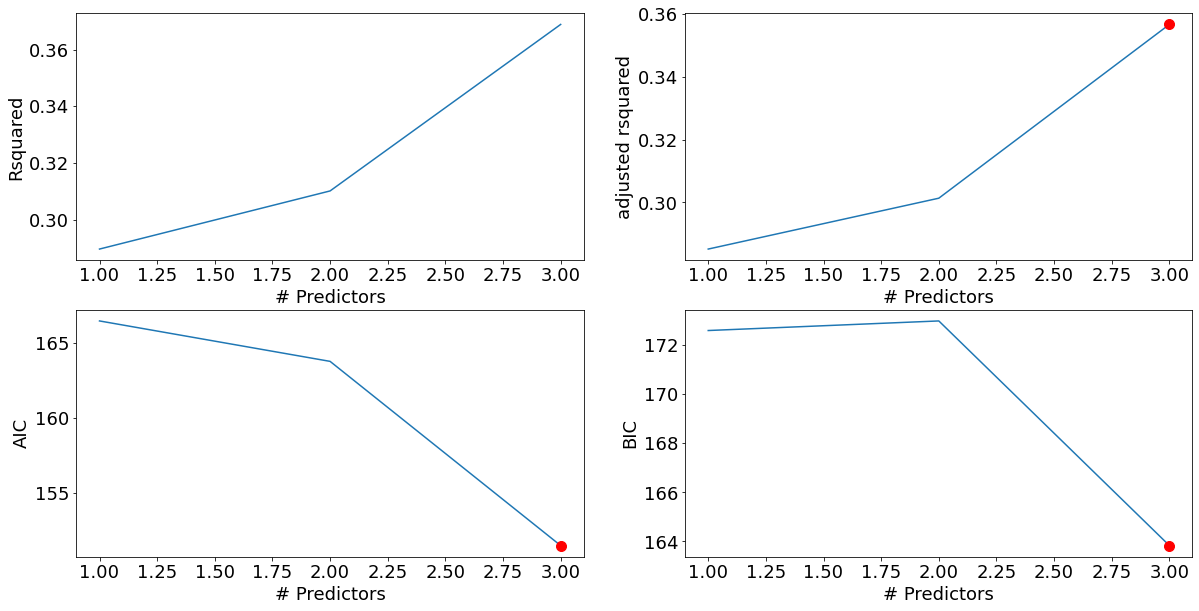

In [90]:
best_sub_plots()

In [91]:
# From BIC curve we should use 3 predictors
best_fwd_reg_model = models_best['model'][3]
best_fwd_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     30.39
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           1.58e-15
Time:                        19:04:56   Log-Likelihood:                -71.766
No. Observations:                 160   AIC:                             151.5
Df Residuals:                     156   BIC:                             163.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7748      0.236     -3.277      0.001      -1.242      -0.308
EXP            0.0002      0.001      0.443      0.658      -0.001       0.001
Rush_TD        0.0325      0.009      3.816      0.000       0.016       0.049
Pass_TD        0.0253      0.007      3.809      0.000       0.012       0.038
==============================================================================
Omnibus:                        6.260   Durbin-Watson:                   1.045
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                4.157
Skew:                           0.239   Prob(JB):                        0.125
Kurtosis:                       2.371   Cond. No.                         946.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Linear Model Development
*By Sid Taneja*

In [135]:
# Naive Model
ols_object = smf.ols(formula = 'W~Yds+TO+FL+Cmp+Pass_Att+Pass_Yds+Pass_TD+Int+Rush_Yds+Rush_TD+Pen+Pen_Yds+First_Downs+Rush_1stD+YardsPerPass+YardsPerAttempt+Rush_1stD+TOPerc+Ply+PF+NYA+EXP+ScPerc + Rush_Att + Tot_1stPy + Pass_1stD', data = train_data_lin)
naive_model = ols_object.fit()
naive_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     20.45
Date:                Sat, 11 Mar 2023   Prob (F-statistic):           5.12e-33
Time:                        19:26:17   Log-Likelihood:                -292.00
No. Observations:                 160   AIC:                             630.0
Df Residuals:                     137   BIC:                             700.7
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          26.0378     22.980      1.133      0.259     -19.404      71.480
Yds                 0.0011      0.003      0.354      0.724      -0.005       0.007
TO                  0.1342      0.089      1.505      0.135      -0.042       0.311
FL                  0.0629      0.050      1.252      0.213      -0.036       0.162
Cmp                 0.0269      0.011      2.512      0.013       0.006       0.048
Pass_Att            0.0255      0.016      1.551      0.123      -0.007       0.058
Pass_Yds            0.0026      0.003      1.005      0.317      -0.003       0.008
Pass_TD            -0.0422      0.060     -0.705      0.482      -0.160       0.076
Int                 0.0714      0.058      1.238      0.218      -0.043       0.185
Rush_Yds           -0.0015      0.004     -0.411      0.681      -0.009       0.006
Rush_TD            -0.0537      0.071     -0.760      0.448      -0.193       0.086
Pen                 0.0192      0.023      0.849      0.397      -0.025       0.064
Pen_Yds            -0.0007      0.002     -0.290      0.772      -0.005       0.004
First_Downs         0.0230      0.012      1.995      0.048       0.000       0.046
Rush_1stD          -0.0087      0.014     -0.598      0.551      -0.037       0.020
YardsPerPass       -3.0008      3.956     -0.759      0.449     -10.824       4.822
YardsPerAttempt     0.3736      2.084      0.179      0.858      -3.747       4.494
TOPerc             -0.6301      0.260     -2.421      0.017      -1.145      -0.115
Ply                -0.0814      0.028     -2.914      0.004      -0.137      -0.026
PF                  0.0333      0.010      3.365      0.001       0.014       0.053
NYA                -1.5388      2.113     -0.728      0.468      -5.717       2.640
EXP                -0.0015      0.003     -0.452      0.652      -0.008       0.005
ScPerc             -0.0314      0.069     -0.455      0.650      -0.168       0.105
Rush_Att            0.0852      0.034      2.508      0.013       0.018       0.152
Tot_1stPy           0.0261      0.018      1.481      0.141      -0.009       0.061
Pass_1stD           0.0056      0.013      0.414      0.679      -0.021       0.032
==============================================================================
Omnibus:                        0.642   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.725   Jarque-Bera (JB):                0.515
Skew:                          -0.139   Prob(JB):                        0.773
Kurtosis:                       3.012   Cond. No.                     1.01e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.32e-23. This might indicate that there a

In [177]:
# Forward Stepwise Regression Model (linear)
import time
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

#Function to develop a model based on all predictors in predictor_subset
def processSubset_1(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = sm.ols('W ~' + '+'.join(predictor_subset),data = train_data_lin).fit()
    Rsquared = model.rsquared
    return {"model":model, "Rsquared":Rsquared}

def getBest_model_1(k):
    tic = time.time()
    results = []
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset((list(combo))))

    # Wrap everything up in a dataframe
    models = pd.DataFrame(results)

    # Choose the model with the highest RSS
    print(models.loc[models['Rsquared'].argmax()])
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    return best_model

def best_sub_plots_1():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    plt.plot(models_best["Rsquared"])
    plt.xlabel('# Predictors')
    plt.ylabel('Rsquared')

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

    rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(rsquared_adj)
    plt.plot(1+rsquared_adj.argmax(), rsquared_adj.max(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('adjusted rsquared')

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 3)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 4)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')
    
def forward_1(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

def forward_selection_1():
    models_best = pd.DataFrame(columns=["Rsquared", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [178]:
X = train_data_lin[["Yds","TO","FL","Cmp","Pass_Att","Pass_Yds","Pass_TD","Int","Rush_Yds","Rush_TD","Pen","Pen_Yds","First_Downs","Rush_1stD","YardsPerPass","YardsPerAttempt","Rush_1stD","TOPerc","Ply","PF","NYA","EXP","ScPerc","Rush_Att","Tot_1stPy","Pass_1stD"]]
models_best_1 = forward_selection_1()

Processed  26 models on 1 predictors in 0.14580416679382324 seconds.
Processed  25 models on 2 predictors in 0.10996389389038086 seconds.
Processed  24 models on 3 predictors in 0.13692808151245117 seconds.
Processed  23 models on 4 predictors in 0.14339208602905273 seconds.
Processed  22 models on 5 predictors in 0.1554100513458252 seconds.
Processed  21 models on 6 predictors in 0.15958189964294434 seconds.
Processed  20 models on 7 predictors in 0.1889050006866455 seconds.
Processed  19 models on 8 predictors in 0.17307591438293457 seconds.
Processed  18 models on 9 predictors in 0.19288420677185059 seconds.
Processed  17 models on 10 predictors in 0.18198680877685547 seconds.
Processed  16 models on 11 predictors in 0.2364358901977539 seconds.
Processed  15 models on 12 predictors in 0.19800806045532227 seconds.
Processed  14 models on 13 predictors in 0.19593596458435059 seconds.
Processed  13 models on 14 predictors in 0.20133399963378906 seconds.
Processed  12 models on 15 predi

KeyError: 'Rsquared'

In [ ]:
best_sub_plots()

In [ ]:
best_fwd_reg_model_lin = models_best['model'][4]
best_fwd_reg_model_lin.summary()

### Ridge Model

In [138]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score

# Ridge Regression - will not transform wins as it is not right skewed
y = train_data_lin.W
X = train_data_lin[["Yds","TO","FL","Cmp","Pass_Att","Pass_Yds","Pass_TD","Int","Rush_Yds","Rush_TD","Pen","Pen_Yds","First_Downs","Rush_1stD","YardsPerPass","YardsPerAttempt","Rush_1stD","TOPerc","Ply","PF","NYA","EXP","ScPerc","Rush_Att","Tot_1stPy","Pass_1stD"]]
scaler = StandardScaler()
scaler.fit(X)
Xstd = scaler.transform(X)

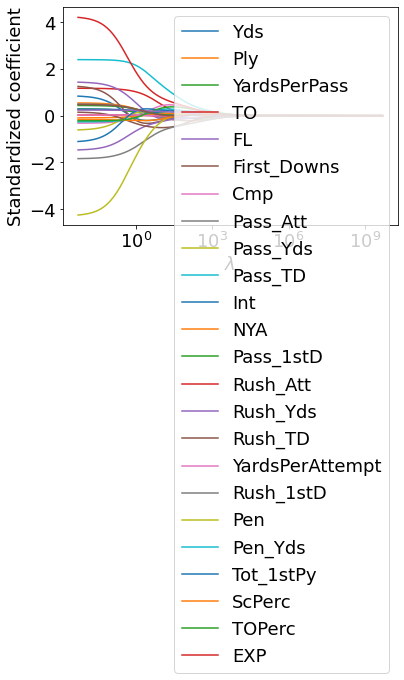

In [139]:
coefs = []
alphas = 10**np.linspace(10,-2,200)*0.5
for a in alphas:        
    ridge = Ridge(alpha = a)
    ridge.fit(Xstd, y)
    coefs.append(ridge.coef_)
    
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.ylabel('Standardized coefficient')
legend = plt.legend(train_data_lin.columns[2:28])

In [140]:
# Optimal Tuning Parameter
alphas = 10**np.linspace(1.5,-3,200)*0.5
ridgecv = RidgeCV(alphas = alphas,store_cv_values=True)
ridgecv.fit(Xstd, y)
ridgecv.alpha_

0.5359456596025638

In [141]:
Xtest = X = test_data_lin[["Yds","TO","FL","Cmp","Pass_Att","Pass_Yds","Pass_TD","Int","Rush_Yds","Rush_TD","Pen","Pen_Yds","First_Downs","Rush_1stD","YardsPerPass","YardsPerAttempt","Rush_1stD","TOPerc","Ply","PF","NYA","EXP","ScPerc","Rush_Att","Tot_1stPy","Pass_1stD"]]
Xtest_std = scaler.transform(Xtest)

# Regular Regression Model
ridge = Ridge(alpha = ridgecv.alpha_)
ridge.fit(Xstd, y)
pred=ridge.predict(Xtest_std)

In [142]:
np.sqrt(((pred-actual_lin)**2).mean())

2.019118266009287

### Code fitting the final model

Put the code(s) that fit the final model(s) in separate cell(s), i.e., the code with the `.ols()` or `.logit()` functions.

### Logistic

In [27]:
import statsmodels.formula.api as smf
logit_model = smf.logit(formula = 'W ~ Rush_TD + Pass_TD', data = train_data).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.430883
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      W   No. Observations:                  160
Model:                          Logit   Df Residuals:                      157
Method:                           MLE   Df Model:                            2
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.3345
Time:                        17:21:20   Log-Likelihood:                -68.941
converged:                       True   LL-Null:                       -103.59
Covariance Type:            nonrobust   LLR p-value:                 8.946e-16
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.7588      1.355     -6.466      0.000     -11.414      -6.104
Rush_TD        0.2294      0.051      4.538      0.000       0.130       0.328
Pass_TD        0.1756      0.034      5.168      0.000       0.109       0.242
==============================================================================
"""

### Linear